## ***K-means Kumeleme Algoritmasi***

## Q1
Bu ödevin amacı, iris veri kümesine k-ortalama uygulamak ve k değerini değiştirdiğinde ne olacağını görmektir. 

- Varsa, hangi çözümü en iyi olarak görüyorsunuz? Karmaşıklık bu veri kümesinde bir sorun olmaya başlıyor mu? Bulgularınızı mentörle paylaşın. 

- 3'ten fazla kümeyi içeren bir sonuç bulabileceğinizi aklınızdan çıkarmayın.Bu kümelerden ikisi tek bir çiçek türüyle eşleşirken, diğer ikisi örneğin diğer türlerle eşlenir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Kumeleme ve grafik icin fonksiyon tanimi

In [6]:
def cluster_and_plot(n_clusters=3):
    # Defining the k-means
    kmeans_küme = KMeans(n_clusters=n_clusters, random_state=123)

    # Fit model
    kmeans_küme.fit(X_std)
    y_pred = kmeans_küme.predict(X_std)
    
    pca = PCA(n_components=2).fit_transform(X_std)

    plt.figure(figsize=(10,5))
    colours = 'rbg'
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

---
### Kume sayisi: 2

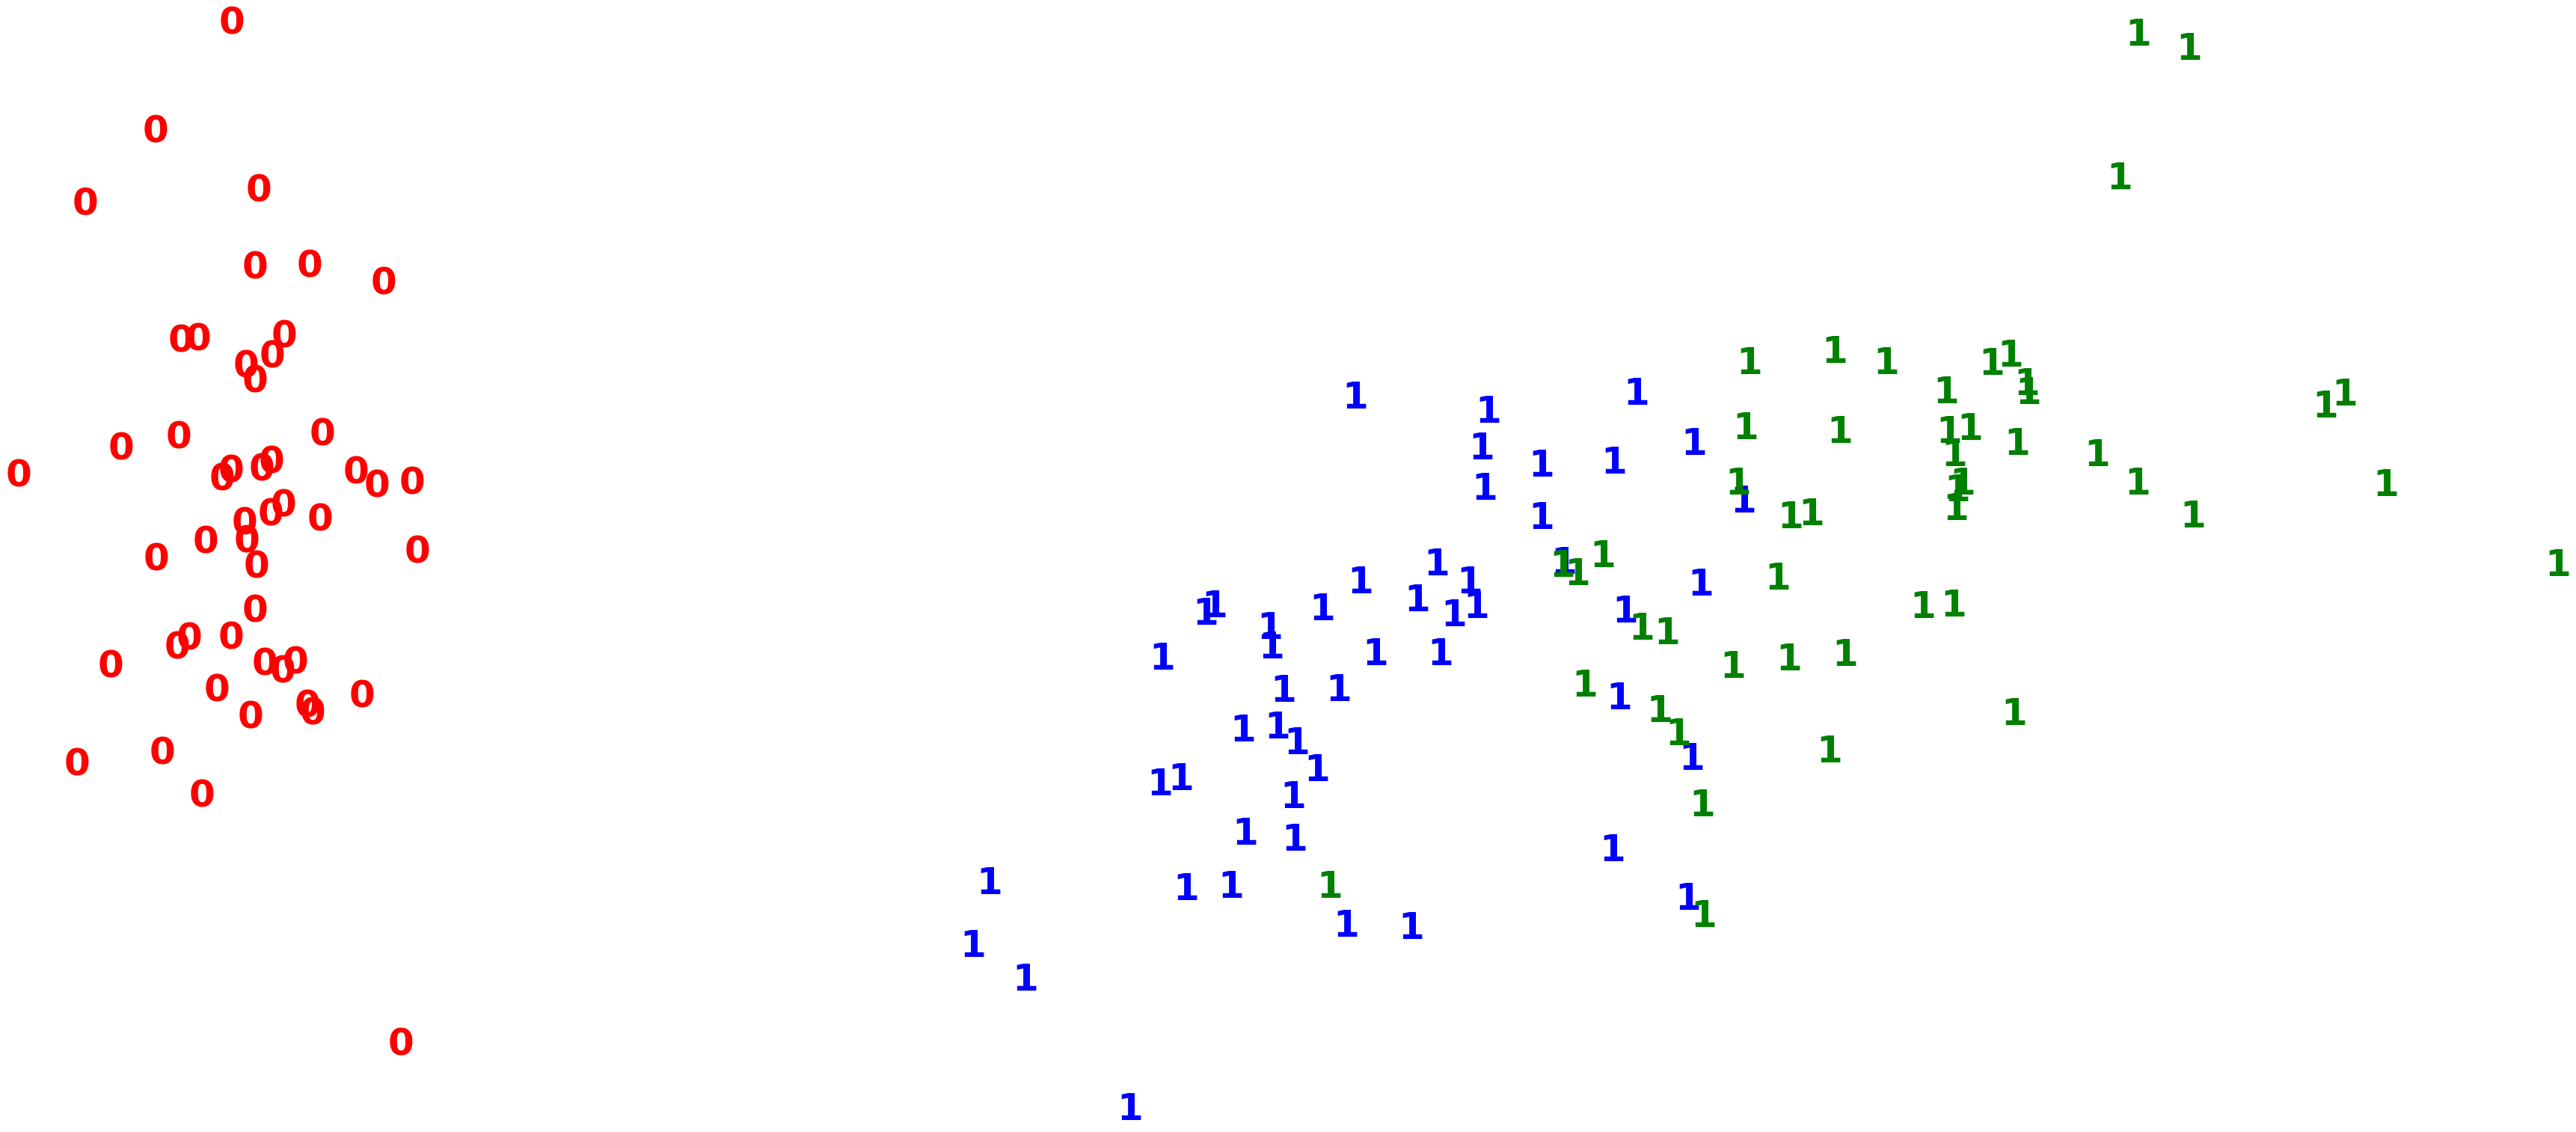

In [7]:
cluster_and_plot(2)

- En iyi cozumun bu oldugu soylenebilir, tabi ki veri hakkinda bilgi sahibi degilsek. Bilgi sahibi olmadigimizda sanki iki kume varmis gibi gozukuyor.

---
### Kume sayisi: 3

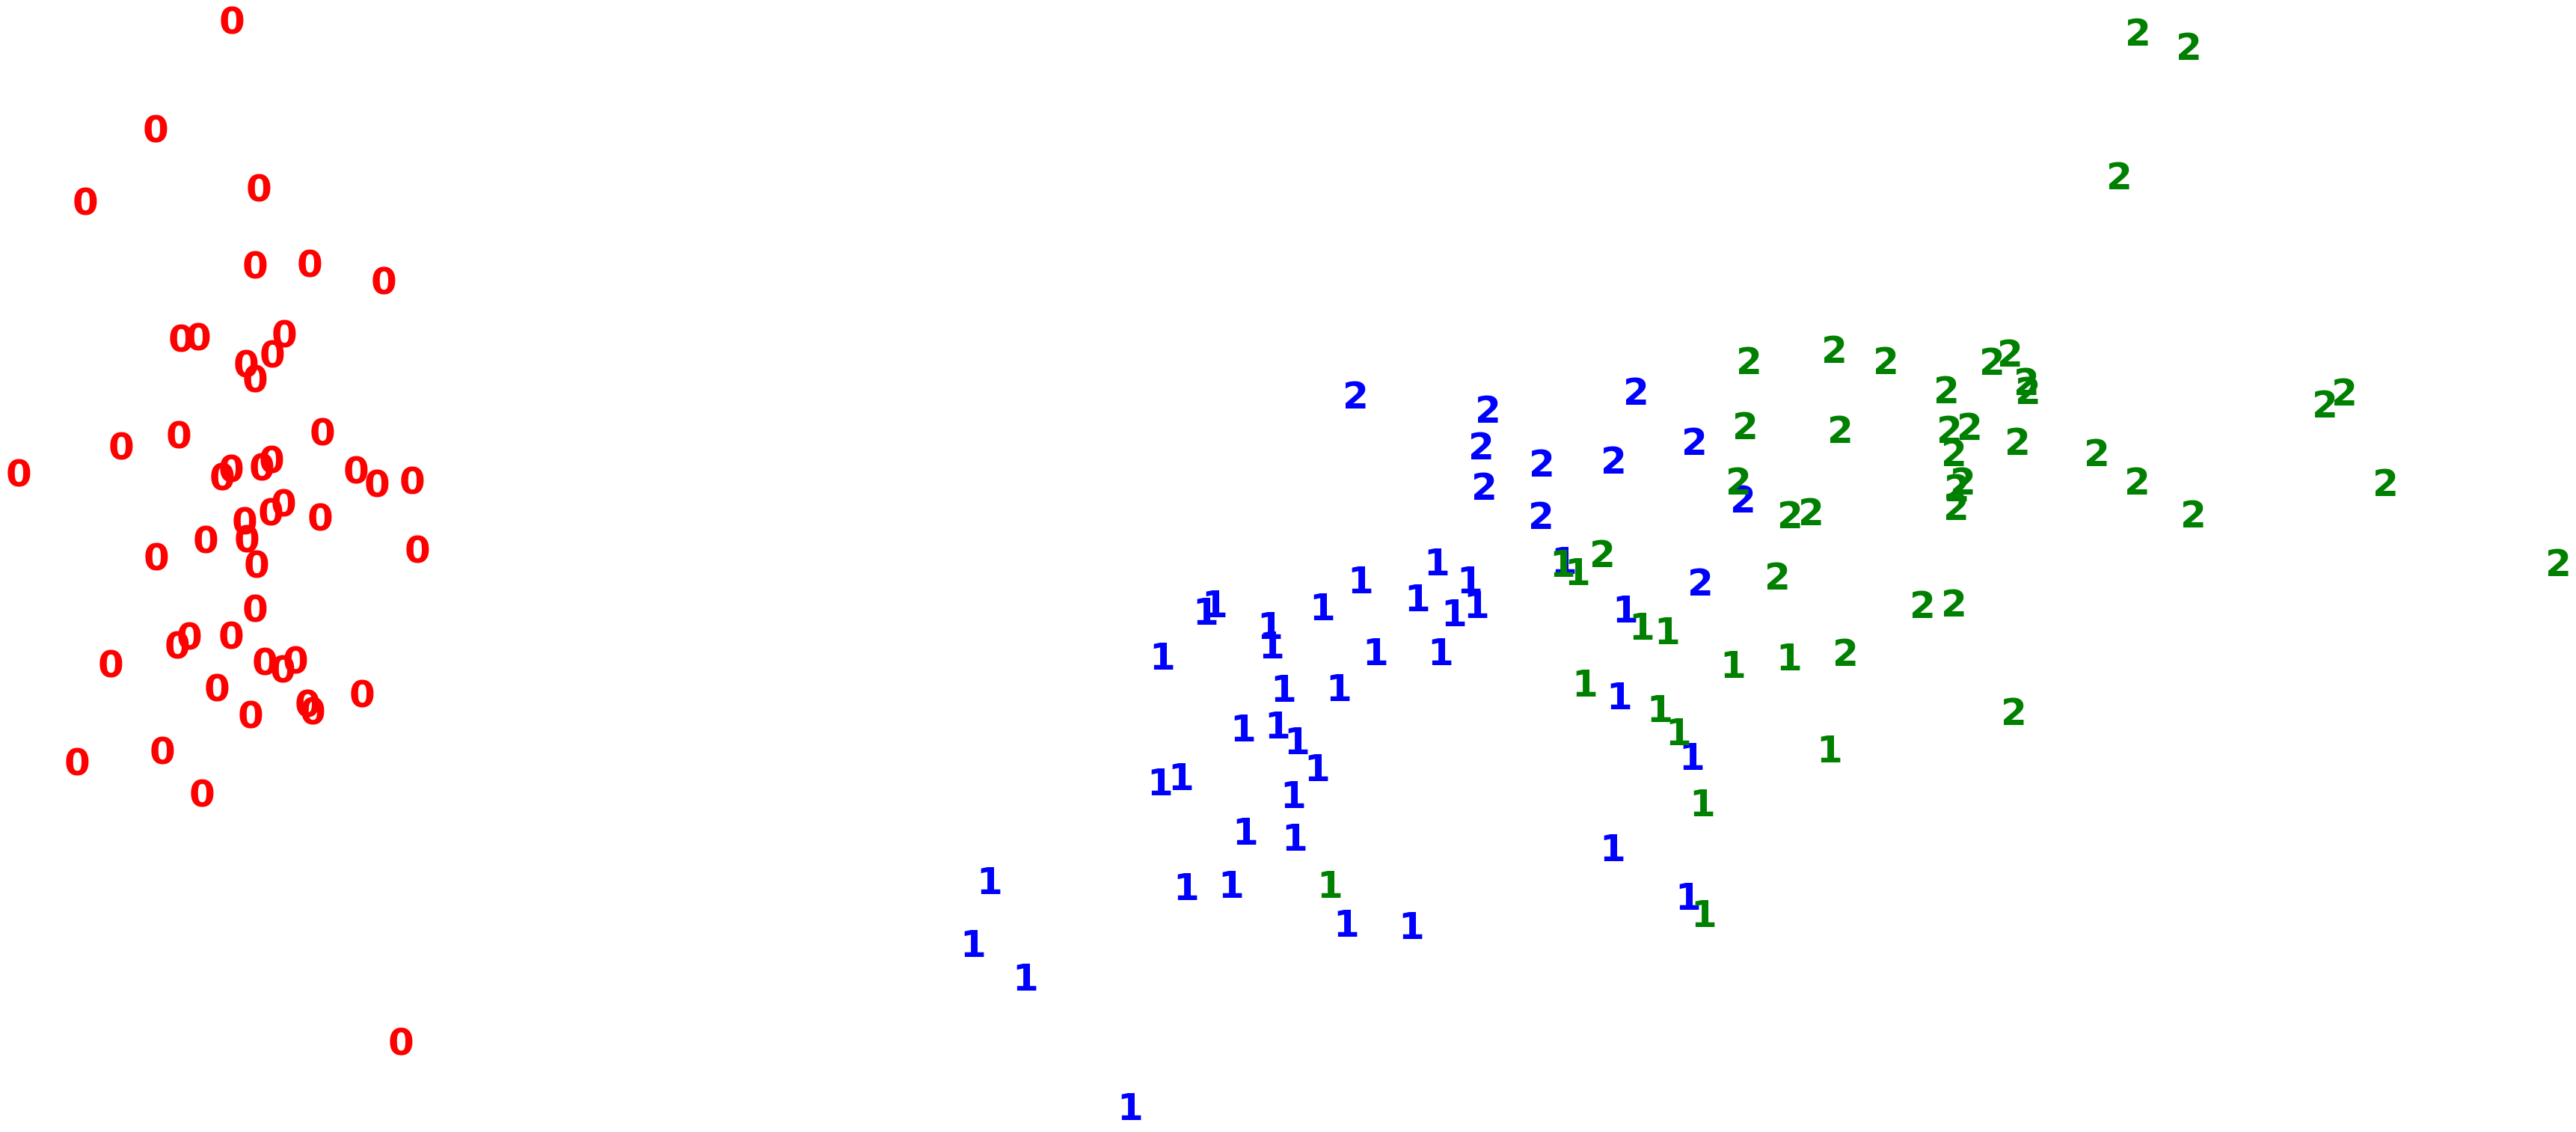

In [8]:
cluster_and_plot(3)

---
### Kume sayisi: 4

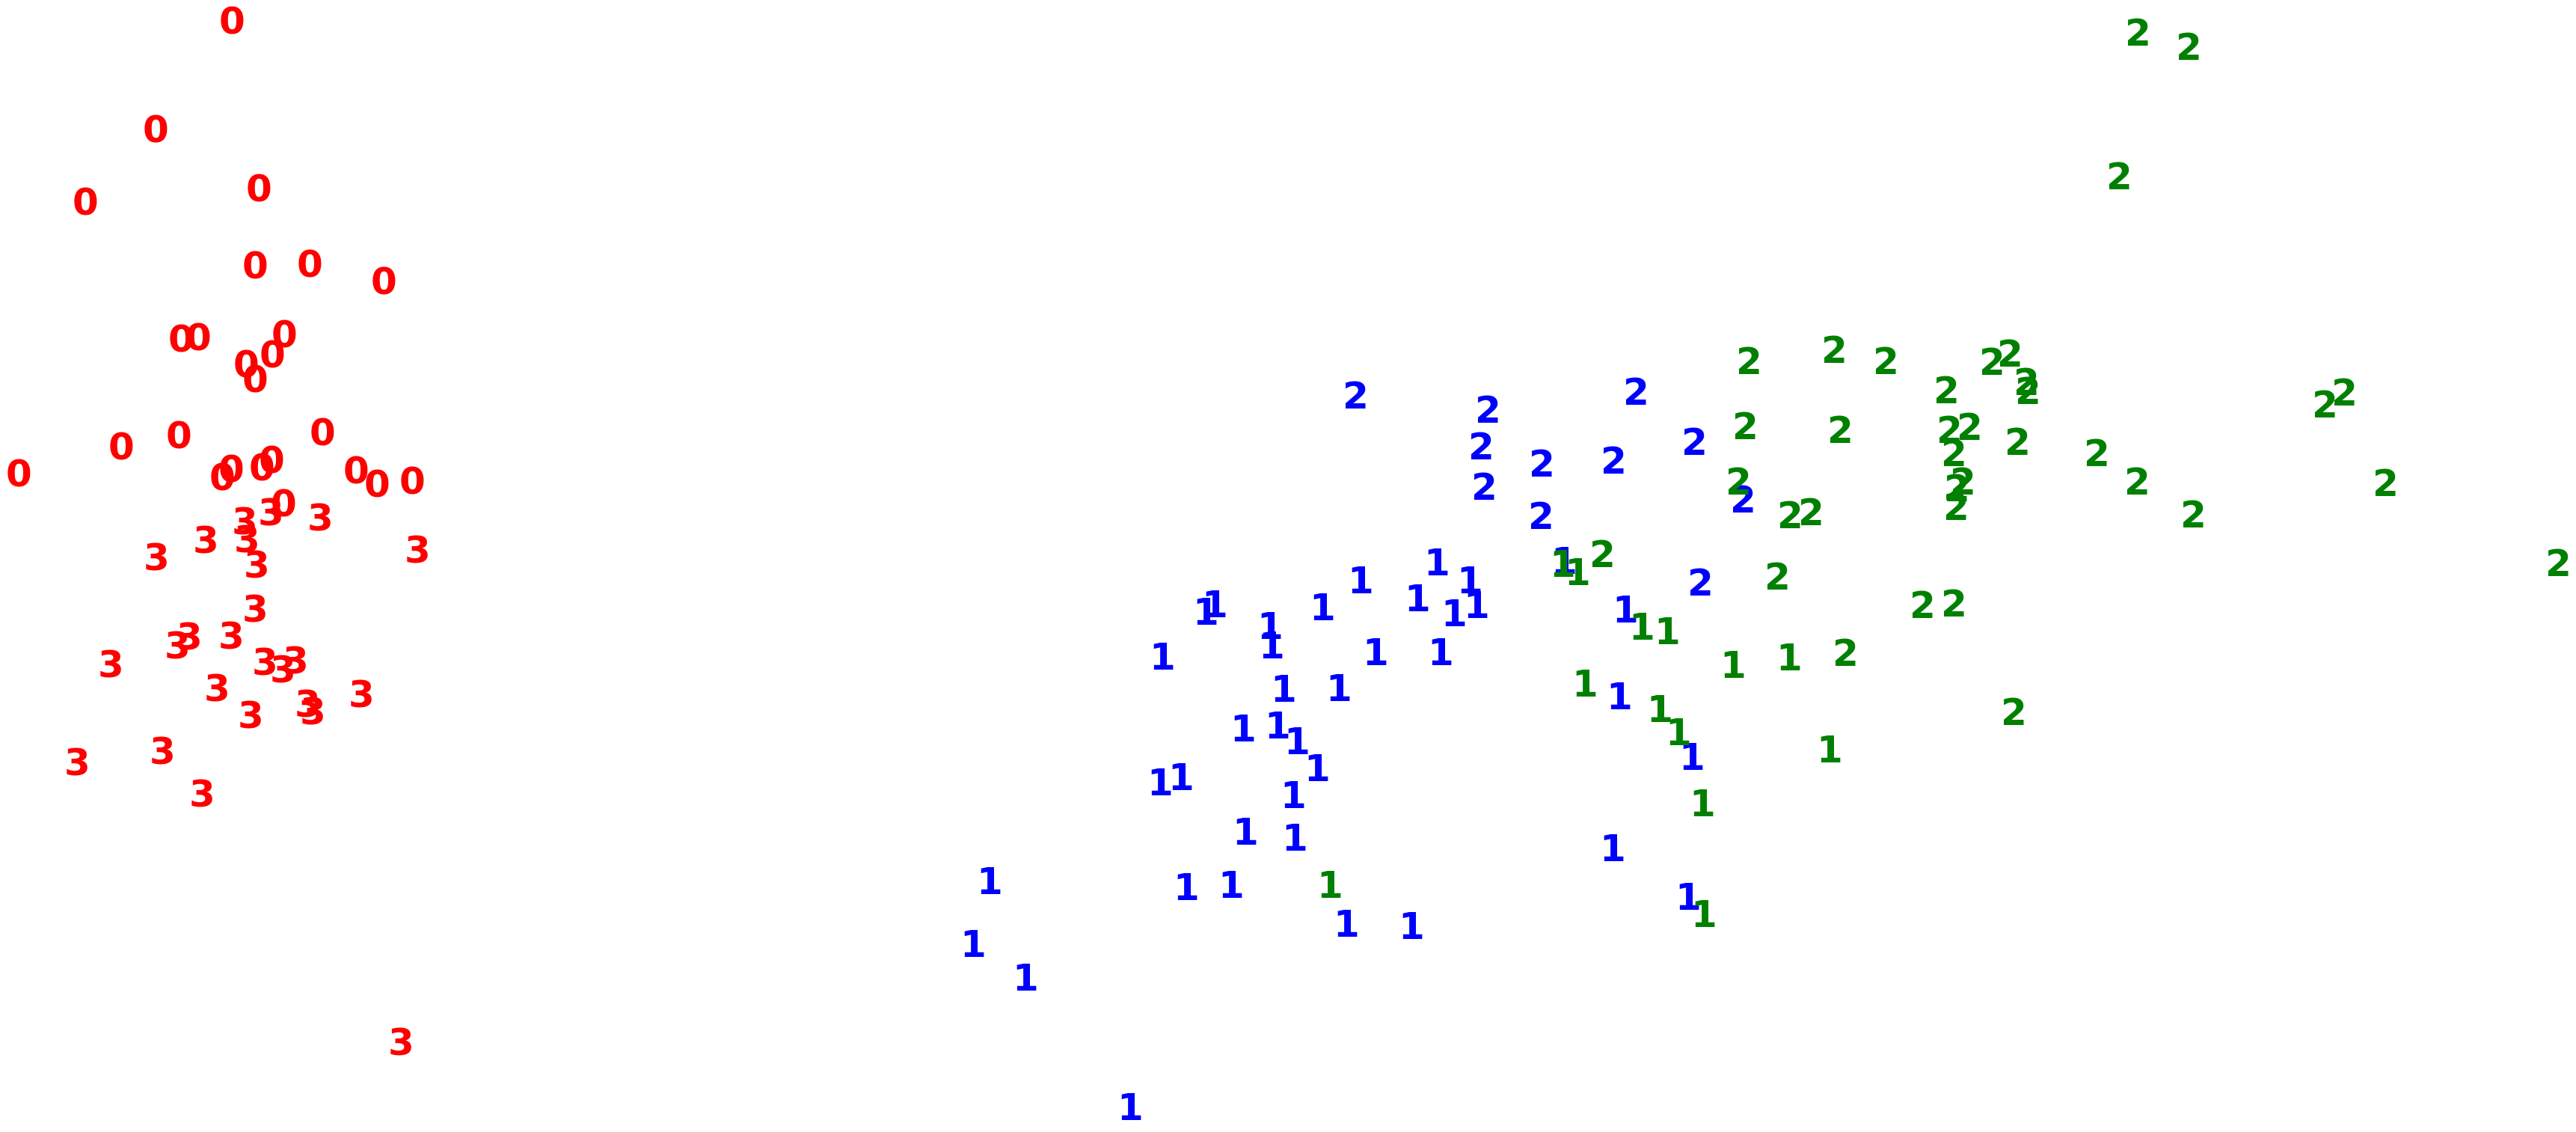

In [9]:
cluster_and_plot(4)

- 4 uncu kume lineer olarak ayrilabilen tek kumenin icerisinde olusturldu, bunun nedeni k-means in hata oranini(kyip fonksiyonunu) en aza indiren cozumu aramasindan kaynaklanmaktadir. Diger iki kumenin bulundugu bolgeye gitmesi hatayi arttirir ve uygun olmazdi.

---
## Q2

Bu ödevde, UC Irvine Machine Learning Repository'de bulunan kalp hastalığı veri setiyle çalışacaksınız.

- Hastaları "kalp hastalığı tanısı" veya "kalp hastalığı tanısı yok" kümelerine doğru şekilde atayan bir k-ortalama çözümü oluşturun. Bu durumda, aslında iki olan verideki doğru küme sayısını biliyoruz. Ancak burada, k-ortalamanın beklediğimiz şekilde gözlemleri atayıp atamadığını test edeceksiniz. K-ortalama, denetimsiz bir öğrenme algoritması olduğu için, hastaların kalp hastalığı olup olmadığına karşı kör olacaktır.

#### Preprocessing

In [33]:
# birden fazla dosyayi okuma
import glob

path = r'./data' # use your path
all_files = glob.glob(path + "/processed*.data")

li = []

for filename in all_files:
    df = pd.read_csv(filename,header=0)
    # sutun isimlerini ayni yapiyoruz ki concat etmede sutun sayimiz artmasin
    # farkli isimdeki sutunlar olusmasin
    df.columns = [x for x in range(14)]
    li.append(df)

heart = pd.concat(li, axis=0, ignore_index=True)

In [34]:
heart

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,34.0,1.0,4.0,115,0,?,?,154,0,.2,1,?,?,1
1,35.0,1.0,4.0,?,0,?,0,130,1,?,?,?,7,3
2,36.0,1.0,4.0,110,0,?,0,125,1,1,2,?,6,1
3,38.0,0.0,4.0,105,0,?,0,166,0,2.8,1,?,?,2
4,38.0,0.0,4.0,110,0,0,0,156,0,0,2,?,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,45.0,1.0,1.0,110,264,0,0,132,0,1.2,2,0.0,7.0,1
912,68.0,1.0,4.0,144,193,1,0,141,0,3.4,2,2.0,7.0,2
913,57.0,1.0,4.0,130,131,0,0,115,1,1.2,2,1.0,7.0,3
914,57.0,0.0,2.0,130,236,0,2,174,0,0,2,1.0,3.0,1


In [35]:
# Veri setini kullanmadan önce bazı ön işlemler yapmanız gerekiyor:

# Define the features and the outcome
X = heart.iloc[:, :13]
y = heart.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

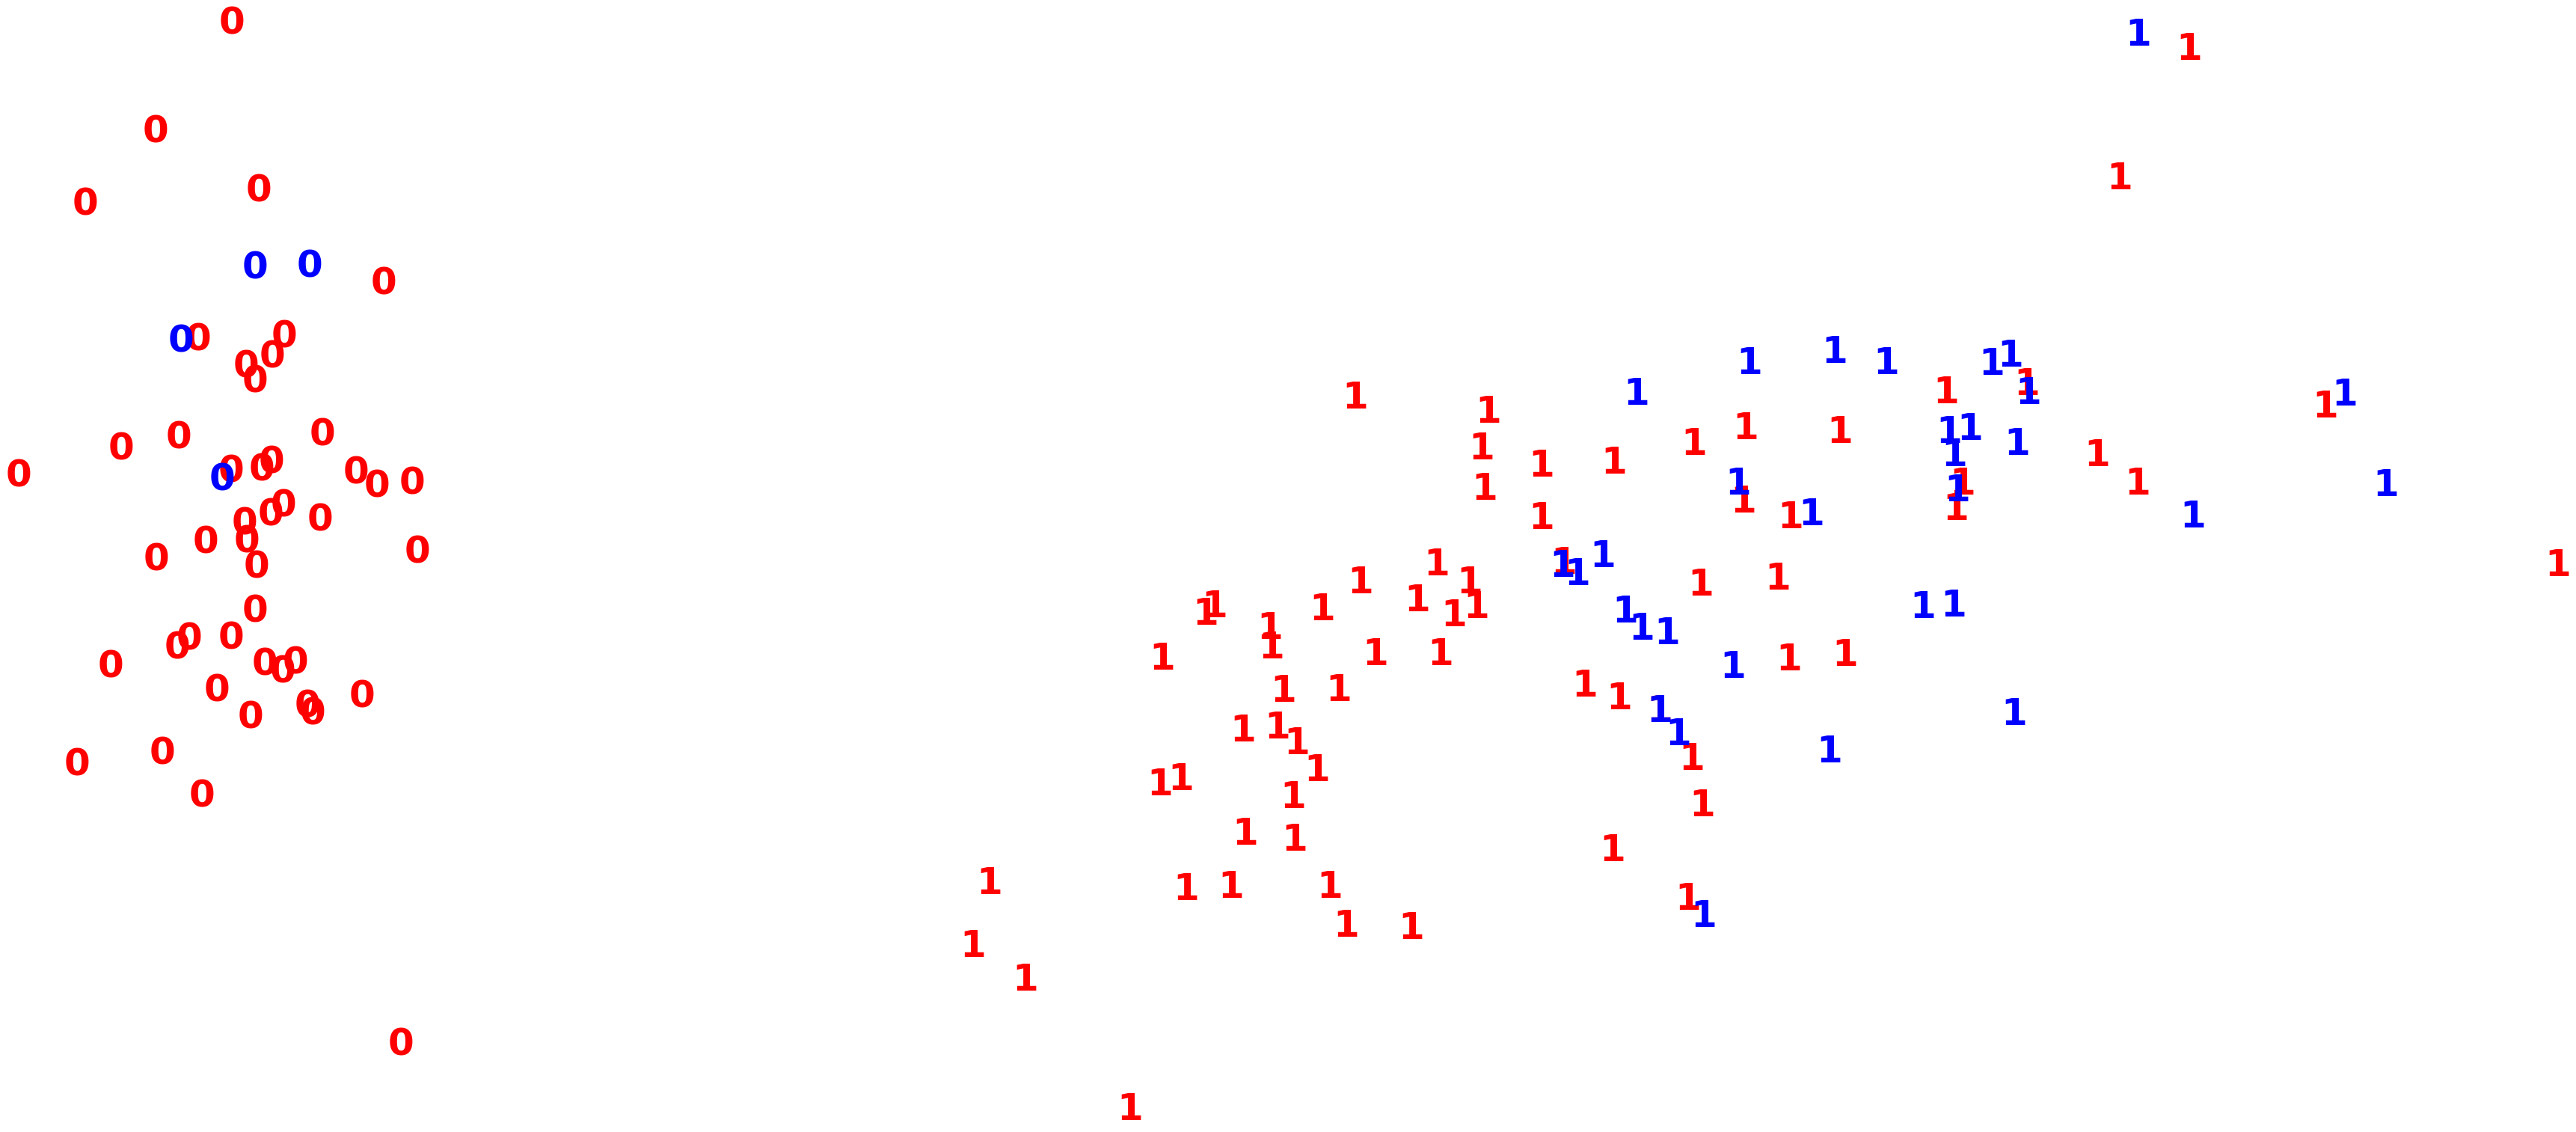

In [38]:
# kumeleyelim ve gercek degerlerle karsilastirmak icin grafigini inceleyelim
cluster_and_plot(2)

- K-ortalama, hastaların kalp hastalığı olup olmadığına karşı kör olmasina ragmen yukaridaki grafikten cok basarili sonuc verdigi gozlenebilir. 